In [1]:
import pandas as pd
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from analysis.utils import optimise_model, plot_variable_importance, load_model, save_model, print_performance_measures, \
    plot_numeric_variable_importance

# Evaluate

In [7]:
df = pd.read_csv('../data/df_extensive_model_tw.csv', index_col=0)

X = df.drop('Value', axis=1)
y = df['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model = load_model('extensive-model-xgb-tw')
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

print_performance_measures(X_test, y_test, y_test_pred, file='performance-extensive-model-tw.csv')

RMSE:		3643391.3897
R^2:		0.5271
Adj. R^2:	0.0025


# Predict

In [2]:
df = pd.read_csv('../data/df_extensive_model_tw.csv', index_col=0)

y = df["Value"]
X = df.drop("Value", axis=1)

results = pd.DataFrame(index=df.index)

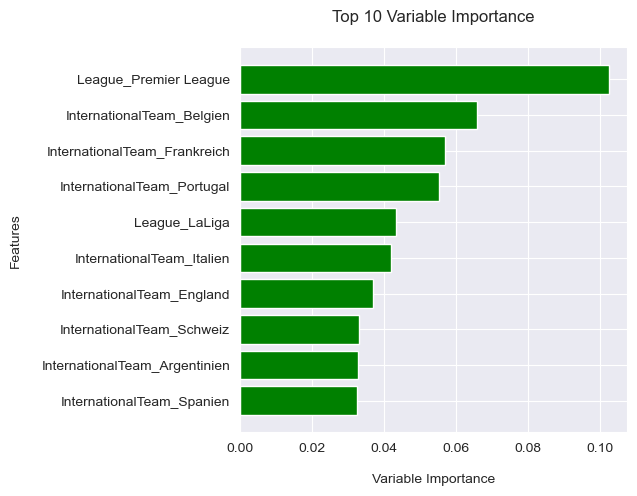

In [3]:
xgb_optimized = load_model('extensive-model-xgb-tw')
plot_variable_importance(xgb_optimized, X)

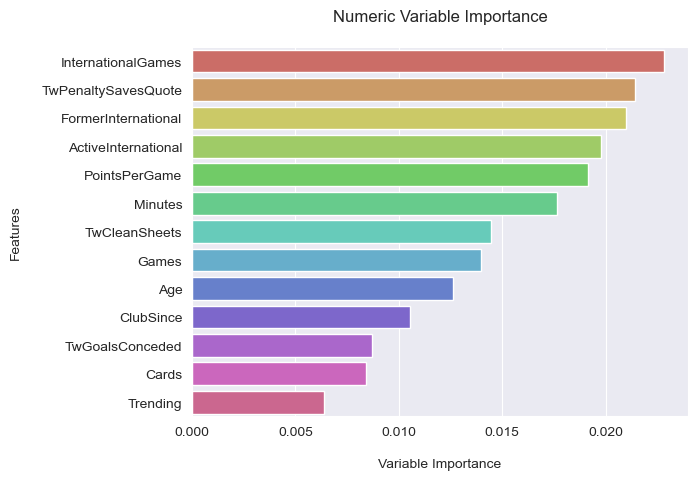

In [4]:
plot_numeric_variable_importance(xgb_optimized, X)

In [5]:
y_pred_xgb = xgb_optimized.predict(X)
results['PredictedValueExtensiveModel'] = y_pred_xgb
print_performance_measures(X, y, y_pred_xgb)

RMSE:		168029.6387
R^2:		0.9991
Adj. R^2:	0.9989


# Export Results

In [6]:
results.to_csv('../data/df_extensive_model_tw_results.csv')

# Model Optimisation

In [15]:
df = pd.read_csv('../data/df_extensive_model_tw.csv', index_col=0)

y = df["Value"]
X = df.drop("Value", axis=1)

In [16]:
%%timeit -r 1 -n 1

param_dist = {
    "learning_rate": uniform(0.01, 0.5),
    "max_depth": randint(1, 10),
    "n_estimators": randint(50, 500),
    "gamma": uniform(0, 5),
    "subsample": uniform(0.1, 0.9),
    "colsample_bytree": uniform(0.1, 0.9),
    "reg_alpha": uniform(0, 1),
    "reg_lambda": uniform(0, 1)
}

xgb_optimized, cv_results = optimise_model(XGBRegressor(), param_dist, X, y, n_iter=100)

save_model(xgb_optimized, 'extensive-model-xgb-tw')

cv_results

Fitting 5 folds for each of 100 candidates, totalling 500 fits
39.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
